SETUP

In [ ]:
from IPython.display import clear_output
!pip install nltk
!pip install sastrawi
!pip install transformers
clear_output()

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import re

LOAD DATASET AND PREPROCESS

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/hastricantya/OTA/main/traveloka_after_removed.csv")
data

,userName,content,score,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,muhammad hafiz,hh,5,3.79.0,2023-07-03 08:45:31,"Hi, thank you very much for the positive revie...",2023-07-03 09:12:06,3.79.0
1,Donny Thyssen,baik,1,3.79.0,2023-07-03 08:33:41,"Hi Kak Donny, kami meminta maaf atas kendala y...",2023-07-03 08:44:05,3.79.0
2,Hendrian Febrianto,oke,4,3.79.0,2023-07-03 08:09:30,NaN,NaN,3.79.0
3,Magfirah Alimuddin,lengkap dan cepat,5,3.79.0,2023-07-03 08:07:37,"Halo Kak, terima kasih banyak atas ratingnya, ...",2023-07-03 08:12:08,3.79.0
4,Guida Susandra,bagus,5,3.79.0,2023-07-03 08:04:55,"Hi Kak, terima kasih atas feedbacknya, semoga ...",2023-07-03 08:12:13,3.79.0
...,...,...,...,...,...,...,...,...
6995,Ahsan Wafiq,ok,5,3.71.1,2023-02-10 01:32:16,"Hi, thank you very much for the positive revie...",2023-02-10 02:00:11,3.71.1
6996,Sun Huaaa,Dulu check in online bisa. Dan mudah. Sekarang...,1,3.71.1,2023-02-10 00:57:55,"Hai, Sun. Mohon maaf sebelumnya. Untuk membant...",2023-02-10 01:06:52,3.71.1
6997,Tri oga,Bagus,5,3.71.0,2023-02-10 00:50:15,"Hi Kak, senang banget nih dapat rating bagus d...",2023-02-10 01:00:13,3.71.0
6998,mhadi kartono,terbaik,5,3.71.0,2023-02-10 00:45:13,"Hai, Kartono. Senangnya mendapat bintang lima ...",2023-02-10 01:01:36,3.71.0


In [ ]:
df = data
df = df.drop('userName', axis=1)
df = df.drop('reviewCreatedVersion', axis=1)
df = df.drop('replyContent', axis=1)
df = df.drop('repliedAt', axis=1)
df = df.drop('appVersion', axis=1)
df = df.drop('score', axis=1)
df = df.drop('at', axis=1)
df

,content
0,hh
1,baik
2,oke
3,lengkap dan cepat
4,bagus
...,...
6995,ok
6996,Dulu check in online bisa. Dan mudah. Sekarang...
6997,Bagus
6998,terbaik


In [ ]:
def text_cleaning(data):
  temporary_text = []

  for text in data:
    # removal of links[https://blabala.com]
    text = re.sub(r"http\S+", "", text)

    # removal of new line
    text = re.sub('\n', '', text)

    # removal of RT
    text = re.sub('RT', '', text)

    # removal of punctuations and numbers
    text = re.sub("[^a-zA-Z^']", " ", text)
    text = re.sub(" {2,}", " ", text)

    # remove leading and trailing whitespace
    text = text.strip()

    # remove whitespace with a single space
    text = re.sub(r'\s+', ' ', text)

    # convert text to Lowercase
    text = text.lower();
    temporary_text.append(text)
  return temporary_text

In [ ]:
df['case_folded'] = text_cleaning(df['content'])
df.head(25)

,content,case_folded
0,hh,hh
1,baik,baik
2,oke,oke
3,lengkap dan cepat,lengkap dan cepat
4,bagus,bagus
5,puas,puas
6,Sangat membantu dan diskon harganya pantastis,sangat membantu dan diskon harganya pantastis
7,ok,ok
8,mantap,mantap
9,praktis & banyak manfaatnya...👍👍👍👍💯💯💯💯💯,praktis banyak manfaatnya


In [ ]:
import nltk
nltk.download('punkt')

def tokenized(data):
  return data.apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['tokenized'] = tokenized(df['case_folded'])
df.head(25)

,content,case_folded,tokenized
0,hh,hh,[hh]
1,baik,baik,[baik]
2,oke,oke,[oke]
3,lengkap dan cepat,lengkap dan cepat,"[lengkap, dan, cepat]"
4,bagus,bagus,[bagus]
5,puas,puas,[puas]
6,Sangat membantu dan diskon harganya pantastis,sangat membantu dan diskon harganya pantastis,"[sangat, membantu, dan, diskon, harganya, pant..."
7,ok,ok,[ok]
8,mantap,mantap,[mantap]
9,praktis & banyak manfaatnya...👍👍👍👍💯💯💯💯💯,praktis banyak manfaatnya,"[praktis, banyak, manfaatnya]"


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
def stopword_text(tokens):
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [ ]:
df['stop'] = df['tokenized'].apply(stopword_text)
df

,content,case_folded,tokenized,stop
0,hh,hh,[hh],[hh]
1,baik,baik,[baik],[baik]
2,oke,oke,[oke],[oke]
3,lengkap dan cepat,lengkap dan cepat,"[lengkap, dan, cepat]","[lengkap, cepat]"
4,bagus,bagus,[bagus],[bagus]
...,...,...,...,...
6995,ok,ok,[ok],[]
6996,Dulu check in online bisa. Dan mudah. Sekarang...,dulu check in online bisa dan mudah sekarang m...,"[dulu, check, in, online, bisa, dan, mudah, se...","[dulu, check, in, online, mudah, sekarang, mak..."
6997,Bagus,bagus,[bagus],[bagus]
6998,terbaik,terbaik,[terbaik],[terbaik]


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [ ]:
def stemming_text(tokens):
  hasil = [stemmer.stem(token) for token in tokens]
  return hasil

In [ ]:
df['stemmed'] = df['stop'].apply(stemming_text)
df

,content,case_folded,tokenized,stop,stemmed
0,hh,hh,[hh],[hh],[hh]
1,baik,baik,[baik],[baik],[baik]
2,oke,oke,[oke],[oke],[oke]
3,lengkap dan cepat,lengkap dan cepat,"[lengkap, dan, cepat]","[lengkap, cepat]","[lengkap, cepat]"
4,bagus,bagus,[bagus],[bagus],[bagus]
...,...,...,...,...,...
6995,ok,ok,[ok],[],[]
6996,Dulu check in online bisa. Dan mudah. Sekarang...,dulu check in online bisa dan mudah sekarang m...,"[dulu, check, in, online, bisa, dan, mudah, se...","[dulu, check, in, online, mudah, sekarang, mak...","[dulu, check, in, online, mudah, sekarang, mak..."
6997,Bagus,bagus,[bagus],[bagus],[bagus]
6998,terbaik,terbaik,[terbaik],[terbaik],[baik]


In [ ]:
df['FINAL_FIX'] = df['stemmed'].apply(lambda x: ' '.join(x))
df

,content,case_folded,tokenized,stop,stemmed,FINAL_FIX
0,hh,hh,[hh],[hh],[hh],hh
1,baik,baik,[baik],[baik],[baik],baik
2,oke,oke,[oke],[oke],[oke],oke
3,lengkap dan cepat,lengkap dan cepat,"[lengkap, dan, cepat]","[lengkap, cepat]","[lengkap, cepat]",lengkap cepat
4,bagus,bagus,[bagus],[bagus],[bagus],bagus
...,...,...,...,...,...,...
6995,ok,ok,[ok],[],[],
6996,Dulu check in online bisa. Dan mudah. Sekarang...,dulu check in online bisa dan mudah sekarang m...,"[dulu, check, in, online, bisa, dan, mudah, se...","[dulu, check, in, online, mudah, sekarang, mak...","[dulu, check, in, online, mudah, sekarang, mak...",dulu check in online mudah sekarang makin lama...
6997,Bagus,bagus,[bagus],[bagus],[bagus],bagus
6998,terbaik,terbaik,[terbaik],[terbaik],[baik],baik


In [ ]:
df['Word_Count'] = df['FINAL_FIX'].str.split().str.len()
df['Word_Count']

0        1
1        1
2        1
3        2
4        1
        ..
6995     0
6996    34
6997     1
6998     1
6999     7
Name: Word_Count, Length: 7000, dtype: int64

In [ ]:
df_filtered = df[df['Word_Count'] >= 5]
df_filtered

,content,case_folded,tokenized,stop,stemmed,FINAL_FIX,Word_Count
6,Sangat membantu dan diskon harganya pantastis,sangat membantu dan diskon harganya pantastis,"[sangat, membantu, dan, diskon, harganya, pant...","[sangat, membantu, diskon, harganya, pantastis]","[sangat, bantu, diskon, harga, pantastis]",sangat bantu diskon harga pantastis,5
15,semoga berhasil tidak mengecewakan untuk pemes...,semoga berhasil tidak mengecewakan untuk pemes...,"[semoga, berhasil, tidak, mengecewakan, untuk,...","[semoga, berhasil, mengecewakan, pemesanan, or...","[moga, hasil, kecewa, mesan, orang, tua]",moga hasil kecewa mesan orang tua,6
18,Sangat kecewa saya beli tiket dgn paylater sa...,sangat kecewa saya beli tiket dgn paylater say...,"[sangat, kecewa, saya, beli, tiket, dgn, payla...","[sangat, kecewa, beli, tiket, dgn, paylater, r...","[sangat, kecewa, beli, tiket, dgn, paylater, r...",sangat kecewa beli tiket dgn paylater reschedu...,65
19,trimakaasihh smg mjd kebahagiaan smua umat.......,trimakaasihh smg mjd kebahagiaan smua umat amin,"[trimakaasihh, smg, mjd, kebahagiaan, smua, um...","[trimakaasihh, smg, mjd, kebahagiaan, smua, um...","[trimakaasihh, smg, mjd, bahagia, smua, umat, ...",trimakaasihh smg mjd bahagia smua umat amin,7
25,"bagus,jadi makin mudah kemana aja",bagus jadi makin mudah kemana aja,"[bagus, jadi, makin, mudah, kemana, aja]","[bagus, jadi, makin, mudah, aja]","[bagus, jadi, makin, mudah, aja]",bagus jadi makin mudah aja,5
...,...,...,...,...,...,...,...
6988,Cerito can I'm Centro9.? .9 0@.3 0/,cerito can i'm centro,"[cerito, can, i, 'm, centro]","[cerito, can, i, 'm, centro]","[cerito, can, i, m, centro]",cerito can i m centro,5
6992,travel yg bertanggung jawab.walaupun ada yg la...,travel yg bertanggung jawab walaupun ada yg la...,"[travel, yg, bertanggung, jawab, walaupun, ada...","[travel, yg, bertanggung, jawab, walaupun, yg,...","[travel, yg, tanggung, jawab, walaupun, yg, lb...",travel yg tanggung jawab walaupun yg lbh murah...,9
6993,"Limit paylater kok turun,,, kecewaaa",limit paylater kok turun kecewaaa,"[limit, paylater, kok, turun, kecewaaa]","[limit, paylater, kok, turun, kecewaaa]","[limit, paylater, kok, turun, kecewaaa]",limit paylater kok turun kecewaaa,5
6996,Dulu check in online bisa. Dan mudah. Sekarang...,dulu check in online bisa dan mudah sekarang m...,"[dulu, check, in, online, bisa, dan, mudah, se...","[dulu, check, in, online, mudah, sekarang, mak...","[dulu, check, in, online, mudah, sekarang, mak...",dulu check in online mudah sekarang makin lama...,34


In [ ]:

df_filtered_new = df_filtered[['FINAL_FIX']].copy()
df_filtered_new

,FINAL_FIX
6,sangat bantu diskon harga pantastis
15,moga hasil kecewa mesan orang tua
18,sangat kecewa beli tiket dgn paylater reschedu...
19,trimakaasihh smg mjd bahagia smua umat amin
25,bagus jadi makin mudah aja
...,...
6988,cerito can i m centro
6992,travel yg tanggung jawab walaupun yg lbh murah...
6993,limit paylater kok turun kecewaaa
6996,dulu check in online mudah sekarang makin lama...


LABELLING PROCESS

In [ ]:
from transformers import pipeline

pretrained_name = "w11wo/indonesian-roberta-base-indolem-sentiment-classifier-fold-0"
                  #"w11wo/indonesian-roberta-base-sentiment-classifier"

nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
review = df_filtered_new['FINAL_FIX']
data = []

for i in review:
  data.append(nlp(i))

In [ ]:
data

[[{'label': 'LABEL_1', 'score': 0.9997554421424866}],
 [{'label': 'LABEL_0', 'score': 0.9997957348823547}],
 [{'label': 'LABEL_0', 'score': 0.9999181032180786}],
 [{'label': 'LABEL_1', 'score': 0.9996556043624878}],
 [{'label': 'LABEL_0', 'score': 0.9846234917640686}],
 [{'label': 'LABEL_0', 'score': 0.9999175071716309}],
 [{'label': 'LABEL_0', 'score': 0.9999340772628784}],
 [{'label': 'LABEL_0', 'score': 0.9999350309371948}],
 [{'label': 'LABEL_0', 'score': 0.9999122619628906}],
 [{'label': 'LABEL_0', 'score': 0.9998531341552734}],
 [{'label': 'LABEL_0', 'score': 0.9989551305770874}],
 [{'label': 'LABEL_0', 'score': 0.9994351267814636}],
 [{'label': 'LABEL_0', 'score': 0.9998772144317627}],
 [{'label': 'LABEL_0', 'score': 0.9999221563339233}],
 [{'label': 'LABEL_0', 'score': 0.9997426867485046}],
 [{'label': 'LABEL_0', 'score': 0.9999322891235352}],
 [{'label': 'LABEL_0', 'score': 0.9984644651412964}],
 [{'label': 'LABEL_0', 'score': 0.9998608827590942}],
 [{'label': 'LABEL_0', 'scor

In [ ]:
df

,content,case_folded,tokenized,stop,stemmed,FINAL_FIX,Word_Count
0,hh,hh,[hh],[hh],[hh],hh,1
1,baik,baik,[baik],[baik],[baik],baik,1
2,oke,oke,[oke],[oke],[oke],oke,1
3,lengkap dan cepat,lengkap dan cepat,"[lengkap, dan, cepat]","[lengkap, cepat]","[lengkap, cepat]",lengkap cepat,2
4,bagus,bagus,[bagus],[bagus],[bagus],bagus,1
...,...,...,...,...,...,...,...
6995,ok,ok,[ok],[],[],,0
6996,Dulu check in online bisa. Dan mudah. Sekarang...,dulu check in online bisa dan mudah sekarang m...,"[dulu, check, in, online, bisa, dan, mudah, se...","[dulu, check, in, online, mudah, sekarang, mak...","[dulu, check, in, online, mudah, sekarang, mak...",dulu check in online mudah sekarang makin lama...,34
6997,Bagus,bagus,[bagus],[bagus],[bagus],bagus,1
6998,terbaik,terbaik,[terbaik],[terbaik],[baik],baik,1


In [ ]:
predicted_label = []
confidence = []

for my_list in data:
  for item in my_list:
    predicted_label.append(item['label'])
    confidence.append(item['score'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_filtered_new['sentiment'] = le.fit_transform(predicted_label)
df_filtered_new['confidence'] = confidence
df_filtered_new

,FINAL_FIX,sentiment,confidence
6,sangat bantu diskon harga pantastis,1,0.999755
15,moga hasil kecewa mesan orang tua,0,0.999796
18,sangat kecewa beli tiket dgn paylater reschedu...,0,0.999918
19,trimakaasihh smg mjd bahagia smua umat amin,1,0.999656
25,bagus jadi makin mudah aja,0,0.984623
...,...,...,...
6988,cerito can i m centro,0,0.999919
6992,travel yg tanggung jawab walaupun yg lbh murah...,1,0.987701
6993,limit paylater kok turun kecewaaa,0,0.999933
6996,dulu check in online mudah sekarang makin lama...,0,0.999566


In [ ]:
def get_analysis(score):
  if score == 0:
    return 'Negative'
  else:
    return 'Positive'

In [ ]:
df_filtered_new['label'] = df_filtered_new['sentiment'].apply(get_analysis)
df_filtered_new

,FINAL_FIX,sentiment,confidence,label
6,sangat bantu diskon harga pantastis,1,0.999755,Positive
15,moga hasil kecewa mesan orang tua,0,0.999796,Negative
18,sangat kecewa beli tiket dgn paylater reschedu...,0,0.999918,Negative
19,trimakaasihh smg mjd bahagia smua umat amin,1,0.999656,Positive
25,bagus jadi makin mudah aja,0,0.984623,Negative
...,...,...,...,...
6988,cerito can i m centro,0,0.999919,Negative
6992,travel yg tanggung jawab walaupun yg lbh murah...,1,0.987701,Positive
6993,limit paylater kok turun kecewaaa,0,0.999933,Negative
6996,dulu check in online mudah sekarang makin lama...,0,0.999566,Negative


DATA MENTAH SCENARIO

<Axes: xlabel='label', ylabel='count'>

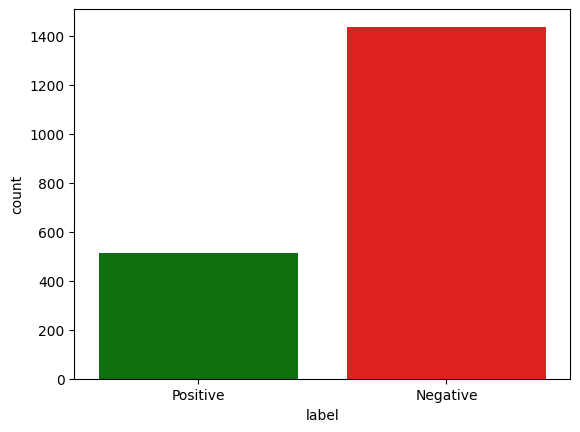

In [ ]:
import seaborn as sns
sns.countplot(x=df_filtered_new["label"], data=df_filtered_new, palette=['Green',"Red"] )

In [ ]:
df_filtered_new.to_csv('Labelled_DataTravelokaRemoved_Skripsi.csv')

UNDERSAMPLING SCENARIO

In [ ]:
positive_values_df = df_filtered_new[df_filtered_new['label'] == 'Positive']
positive_values_df

,FINAL_FIX,sentiment,confidence,label
6,sangat bantu diskon harga pantastis,1,0.999755,Positive
19,trimakaasihh smg mjd bahagia smua umat amin,1,0.999656,Positive
87,alhamdulillah beberapa bln yg lalu pke sangat ...,1,0.999391,Positive
93,upaya gabung pitogo rintis sedia layan jalan p...,1,0.999847,Positive
110,makasih yg setia teman baik hati dgn bonus,1,0.999856,Positive
...,...,...,...,...
6930,bagus pokok lancar jaya sukses trus,1,0.997223,Positive
6959,kalau tambah tiket kapal laut pak,1,0.999095,Positive
6966,harga nya lebih murah dr aplikasi yg metode be...,1,0.992999,Positive
6970,puas dgn aplikasi mudah mesan hotel jalan kelu...,1,0.823511,Positive


In [ ]:
negative_values_df = df_filtered_new[df_filtered_new['label'] == 'Negative']
negative_values_df = negative_values_df[:600]
negative_values_df

,FINAL_FIX,sentiment,confidence,label
15,moga hasil kecewa mesan orang tua,0,0.999796,Negative
18,sangat kecewa beli tiket dgn paylater reschedu...,0,0.999918,Negative
25,bagus jadi makin mudah aja,0,0.984623,Negative
29,sangat mudah guna sangat bantu,0,0.999918,Negative
30,lama lama jelek bgt aplikasi kmrn beli tiket p...,0,0.999934,Negative
...,...,...,...,...
3045,proses mesan yg sangat mudah cepat percaya ter...,0,0.999775,Negative
3063,min mau nanya mes tiket bioskop lgi,0,0.999885,Negative
3069,alam kesan refund fast respon,0,0.999895,Negative
3090,semenjak d ufade tambah lot trus vocer guna se...,0,0.999480,Negative


In [ ]:
final_df = pd.concat([positive_values_df, negative_values_df], ignore_index=True)
final_df_shuffled = final_df.sample(frac=1).reset_index(drop=True)
final_df_shuffled.to_csv('Final_LabelledTravelokaRemoved.csv')
final_df_shuffled

,FINAL_FIX,sentiment,confidence,label
0,sangat bagus respon lumayan cepat layan resche...,0,0.999911,Negative
1,baik sistem trveloka limit jt jadi turun trus ...,0,0.999922,Negative
2,cepat proses senang tiap kali ubah selalu kaba...,1,0.999853,Positive
3,sangat mudah ambil tiket pesawat,1,0.999491,Positive
4,bagus tingkat terus reward buat langgan,1,0.985971,Positive
...,...,...,...,...
1108,sangat kecewa sekali krna kerja sama travelio ...,0,0.999913,Negative
1109,teman setia dinas luar pulau,1,0.526192,Positive
1110,sangat gampang via beli tiket pesawat,1,0.999622,Positive
1111,mudah banyak promo nya very recommended,1,0.999514,Positive


OVER SAMPLING SCENARIO

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Load the CSV file
file_path = 'Labelled_DataTravelokaRemoved_Skripsi.csv'
df = pd.read_csv("https://raw.githubusercontent.com/hastricantya/OTA/main/Labelled_DataTravelokaRemoved_Skripsi.csv")

# Separate features and target
X = df.drop(columns=['FINAL_FIX'])
y = df['FINAL_FIX']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply Random Over-Sampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Combine the resampled data back into a DataFrame
df_resampled = pd.concat([pd.DataFrame(X_train_resampled), pd.Series(y_train_resampled, name='Content')], axis=1)

# Save the oversampled data to a new CSV file
oversampled_file_path = 'oversampled_data.csv'
df_resampled.to_csv(oversampled_file_path, index=False)

# Confirm the oversampling results
print("Original class distribution:")
print(y_train.value_counts())
print("\nOversampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())

In [ ]:
df

TRANSLATE

In [ ]:
!pip install -U deep-translator

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hastricantya/OTA/main/Labelled_DataTravelokaRemoved_Skripsi.csv')
df

In [ ]:
from deep_translator import GoogleTranslator

data_indo = df['FINAL_FIX']

process_data_indo = []

for i in data_indo:
    process_data_indo.append(GoogleTranslator(source='id', target='en').translate(i))

In [ ]:
process_data_indo

In [ ]:
# Create a new DataFrame with the processed data
df_processed = pd.DataFrame({'Translated_TEXT': process_data_indo})

# Save the DataFrame as a CSV file
output_file_path = 'processed_data.csv'
df_processed.to_csv(output_file_path, index=False)

print(f"Processed data saved to {output_file_path}.")

VADER LABELLING

In [ ]:
!pip install vaderSentiment

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_sentiment_label(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(text)
    compound_score = sentiment_score['compound']

    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return None

# Replace 'your_data.csv' with the path to your CSV file
input_csv_path = 'your_data.csv'
output_csv_path = 'labeled_data.csv'  # Output file to save the labeled data

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(input_csv_path)

# Apply sentiment analysis and label the data
df['Sentiment'] = df['Text'].apply(get_sentiment_label)

# Filter only rows with positive or negative sentiment (exclude neutral and unclassified)
df = df.dropna(subset=['Sentiment'])

# Save the labeled data to a new CSV file
df.to_csv(output_csv_path, index=False)

print("Sentiment labeling completed and saved to labeled_data.csv.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')